# Task 2
## Team 15
- Ahmed Hossam Sedky
- Ahmed Mohamed Abdelfattah
- Ehab Wahba Abdelrahman
- Mo'men Maged Mohamed
- Mohaned Alaa Ragab

**Import numpy and the required image processing functions**

*Note: cv2 is only imported to open the image and get its dimensions*

In [1]:
# from libs import normalization, equalization, filters, noise, graphs, edge_detection, threshold
from libs import filters, edge_detection ,hough
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

**Open the image**

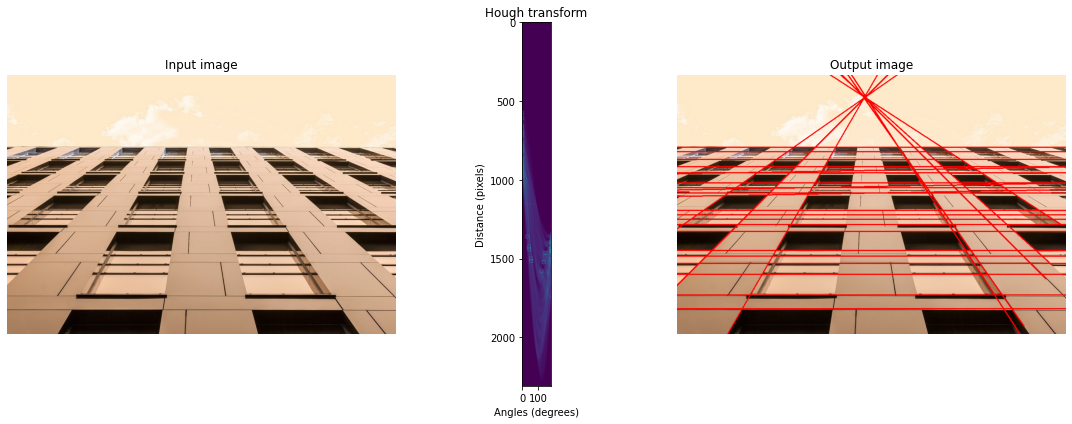

In [2]:
img = cv2.imread("images/building2.jpg")

copImg = np.copy(img)

houghSpace, thetas, rhos = hough.houghLine(img)

numPeaks = 30
indicies, H = hough.hough_peaks(houghSpace, numPeaks, nhood_size=20)  # find peaks
hough.hough_lines_draw(img, indicies, rhos, thetas)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(copImg)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(houghSpace)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img)
ax[2].set_title('Output image')
ax[2].set_axis_off()


plt.tight_layout()
plt.show()

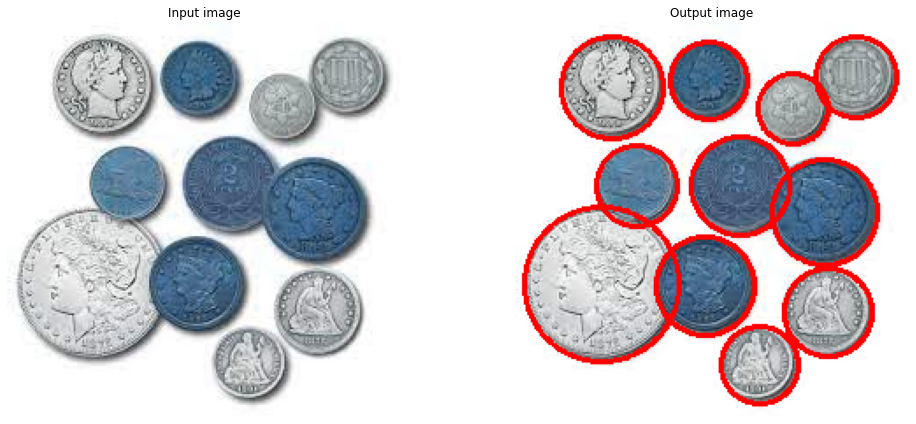

In [3]:
img = cv2.imread("images/coins1.jpg")
copImg =np.copy(img)

min_radius = 2
max_radius = 45
circles  = hough.houghCircle(img, threshold=10, region=15, radius=[max_radius, min_radius]) #threshold = 10,15 
hough.hough_circle_draw(circles , img
 )

# Generating figure 1
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(copImg)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(img)
ax[1].set_title('Output image')
ax[1].set_axis_off()


plt.tight_layout()
plt.show()